# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 3: *TemplateConvolution*
Filter an image by convolution of a template
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageL, createImageL

# Iteration
from timeit import itertools

### Parameters:
    imageName = Input image name
    kernelSize = Size of the kernel

In [2]:
imageName = "Giraffe.png"
kernelSize = 5

### Read and show input image

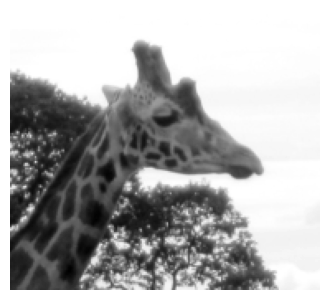

In [3]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter3/Input/")
inputImage, width, height  = imageReadL(pathToDir + imageName)
plotImageL(inputImage, figureSize = 4)

### Create Kernel

In [4]:
kernelImage = createImageL(kernelSize, kernelSize)

# Set the pixels of a flat kernel
for x,y in itertools.product(range(0, kernelSize), range(0, kernelSize)):
    kernelImage[y,x] = 1.0  

### Apply and show Kernel

In [5]:
# Create images to store the result
outputImage = createImageL(width, height)

# Apply kernel
kernelCentre = int((kernelSize - 1) / 2)
for x,y in itertools.product(range(0, width), range(0, height)):
    sumKernel = 0.0
    sumKernelWeights = 0
    for wx,wy in itertools.product(range(0, kernelSize), range(0, kernelSize)):
        posY = y + wy - kernelCentre
        posX = x + wx - kernelCentre 
        
        if posY > -1 and posY <  height and  posX > -1 and posX <  width:
            sumKernel += inputImage[posY,posX] * kernelImage[wy, wx]
            sumKernelWeights += kernelImage[wy, wx]
    
    if sumKernelWeights > 0:
        outputImage[y,x] = sumKernel / sumKernelWeights

### Show ouput image

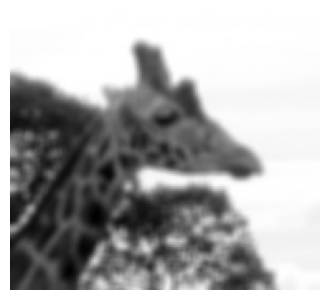

In [6]:
plotImageL(outputImage, figureSize = 4)